# HHCART(D) on the Hamarat et al. 2013 Model (Categorical Excluded)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from ema_workbench import load_results
from ema_workbench.analysis import RuleInductionType
from ema_workbench.analysis.feature_scoring import get_ex_feature_scores

from HHCART_SD import HHCartD, load_model
from notebook_helpers.plot_outcomes_lineplot_gaussian import plot_fraction_renewables
from notebook_helpers.clean_hamarat import clean_results
from notebook_helpers.run_hhcart_over_top_features import run_hhcart_over_top_features
from src.config.paths import HAMARAT_DATA_DIR

## Load and Clean the Data

In [2]:
# Load results
experiments, outcomes = load_results(HAMARAT_DATA_DIR / "10000_lhs_2010_2050.tar.gz")

# Clean data → get X and y
X, y_continuous = clean_results(experiments, outcomes)

 ## Plot the Data

Figure saved: renewables_over_time_0_4_threshold.pdf


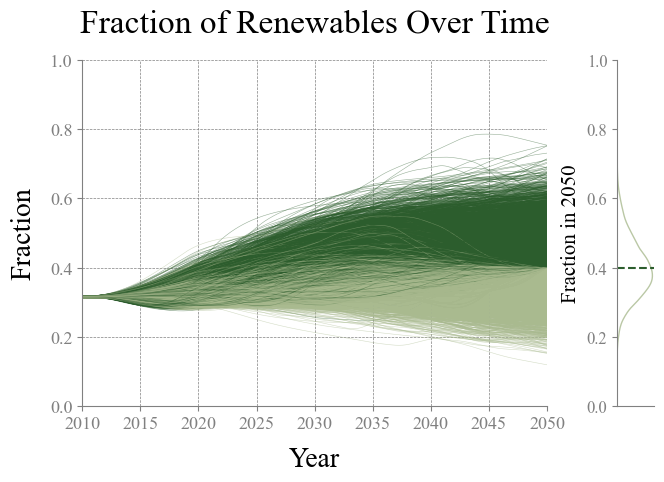


At threshold of 40.0% renewables by 2050:
   → 46.4% of cases exceed threshold (4637 of 10000)
   → 53.6% of cases fall below threshold (5363 of 10000)


In [3]:
plot_fraction_renewables(outcomes, threshold=0.4, save_path="renewables_over_time_0_4_threshold.pdf")

## Set Binary Threshold for y

In [4]:
threshold_value = 0.4  # for example
y = (y_continuous > threshold_value).astype(int)

## Drop Categorical Variables

In [5]:
# Drop SWITCH columns, as they are not needed for the analysis
switch_cols = [col for col in X.columns if col.startswith("Switch")]
X = X.drop(columns=switch_cols)

## Applying HHCART(D)

In [ ]:
# Set tree parameters
max_depth = 8
min_purity = 0.95
mass_min = 0.05

# Instantiate HHCART, build and save tree
hh = HHCartD(X, y, min_purity=min_purity, mass_min=mass_min, max_depth=max_depth)
hh.build_tree(f"hamarat_depth_{max_depth}_pur_{str(min_purity).replace('.', '_')}_mass_{str(mass_min).replace('.', '_')}_no_categorical")

[INFO] Building HHCartD oblique decision tree...
[INFO] Max number of nodes allowed by maximum depth constraint: 511 (used as progress bar target; actual number of splits unknown in advance).


Building tree nodes:   2%|▏         | 10/511 [20:44<6:19:19, 45.43s/it] 

In [ ]:
hh = load_model("hamarat_depth_8_pur_0_95_mass_0_05_no_categorical")
hh.select(depth=3)
hh.inspect()

In [ ]:
for i in range(1, 7):
    hh.plot_tree_structure(depth=i, save=True)

In [ ]:
hh.plot_metrics_vs_structure(save=True)

In [ ]:
hh.plot_metrics_vs_structure(save=True, x_axis="class1_leaf_count")

In [ ]:
hh.plot_tradeoff_path(save=True)

In [ ]:
hh.plot_tradeoff_path(save=True, color_by="class1_leaf_count")

In [ ]:
hh.plot_node_size_distribution(save=True)